<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Presence_of_Smoke  1467 non-null   int64  
 1   Area               1467 non-null   float64
 2   Difference         1467 non-null   float64
 3   ROG                1467 non-null   float64
 4   Color              1467 non-null   int64  
 5   Severity           1467 non-null   int64  
 6   Severity1          1467 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 80.4 KB
(1467, 7)
(1467, 4)
Train on 1173 samples, validate on 294 samples
Epoch 1/10
1152/1173 [============================>.] - ETA: 0s - loss: 0.4298 - acc: 0.7896

C:\Users\saura\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_acc improved from -inf to 0.85034, saving model to weights.best.hdf5


C:\Users\saura\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1173/1173 [==============================] - 2s 2ms/sample - loss: 0.4266 - acc: 0.7917 - val_loss: 0.3071 - val_acc: 0.8503
Epoch 2/10
1164/1173 [============================>.] - ETA: 0s - loss: 0.3134 - acc: 0.8359
Epoch 2: val_acc did not improve from 0.85034
1173/1173 [==============================] - 1s 875us/sample - loss: 0.3130 - acc: 0.8360 - val_loss: 0.2914 - val_acc: 0.8481
Epoch 3/10
1104/1173 [===========================>..] - ETA: 0s - loss: 0.3112 - acc: 0.8294
Epoch 3: val_acc did not improve from 0.85034
1173/1173 [==============================] - 1s 638us/sample - loss: 0.3080 - acc: 0.8318 - val_loss: 0.3255 - val_acc: 0.8027
Epoch 4/10
1068/1173 [==========================>...] - ETA: 0s - loss: 0.3229 - acc: 0.8262
Epoch 4: val_acc did not improve from 0.85034
1173/1173 [==============================] - 1s 865us/sample - loss: 0.3186 - acc: 0.8289 - val_loss: 0.3034 - val_acc: 0.8481
Epoch 5/10
1128/1173 [===========================>..] - ETA: 0s - loss: 0.296

C:\Users\saura\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


(294, 3)
[[9.99951839e-01 3.31228184e-05 1.50213282e-05]
 [9.99951839e-01 3.31228512e-05 1.50213282e-05]
 [7.93083943e-03 9.91867125e-01 2.01988223e-04]
 [1.43530963e-06 9.99998212e-01 3.49800899e-07]
 [4.90916818e-01 3.47994596e-01 1.61088631e-01]
 [9.99951839e-01 3.31228512e-05 1.50213282e-05]
 [4.98747647e-01 3.39773804e-01 1.61478549e-01]
 [9.99951839e-01 3.31228512e-05 1.50213282e-05]
 [9.99971747e-01 1.97107511e-05 8.62642446e-06]
 [4.77520972e-01 3.72359753e-01 1.50119305e-01]
 [1.42462363e-06 9.99998212e-01 3.48441802e-07]
 [7.93083943e-03 9.91867125e-01 2.01988223e-04]
 [2.68048439e-06 9.99996662e-01 6.50797688e-07]
 [4.90916818e-01 3.47994596e-01 1.61088631e-01]
 [1.43530963e-06 9.99998212e-01 3.49800899e-07]
 [5.04532218e-01 3.33977401e-01 1.61490411e-01]
 [9.99953032e-01 3.22624219e-05 1.46160037e-05]
 [1.43530963e-06 9.99998212e-01 3.49800899e-07]
 [1.43062766e-06 9.99998212e-01 3.49546127e-07]
 [4.90916818e-01 3.47994596e-01 1.61088631e-01]
 [9.99951839e-01 3.31228512e-05

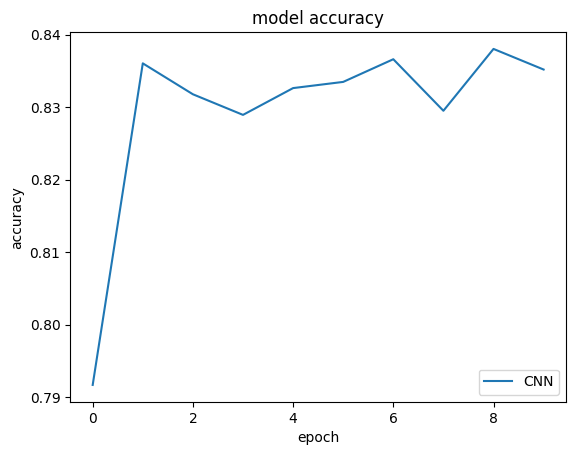

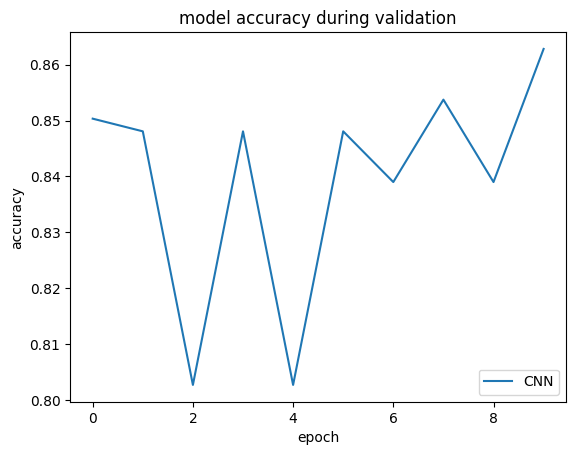

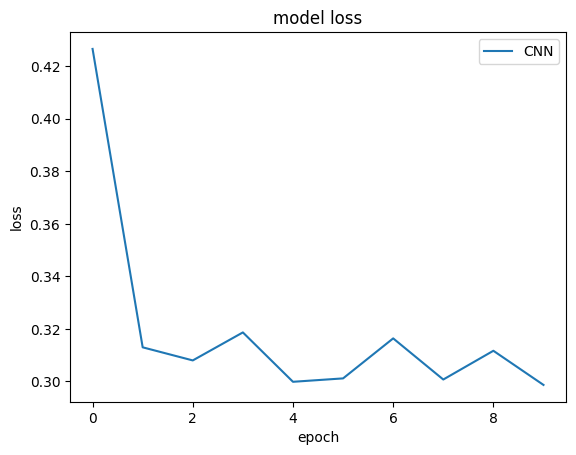

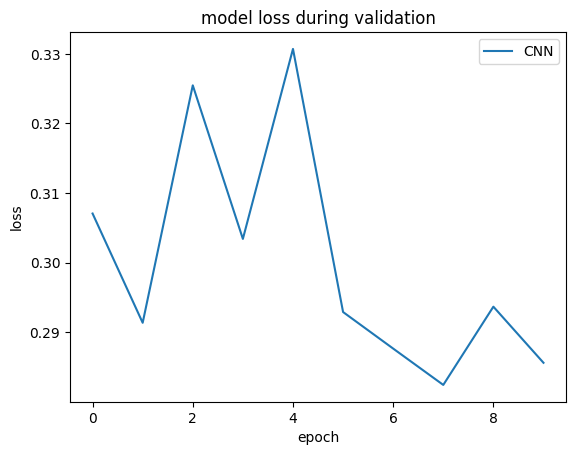

In [11]:
#FINAL

import sys
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import metrics


# Please change drive location as required
df = pd.read_csv('Copyofsmoke_features_final11.csv',delimiter=',',encoding='latin-1')
  

sess1 = tf.Session()

df.info()
print(df.shape)
df=df[['Presence_of_Smoke','Area','ROG','Color','Severity1']]



##create input and output vectors
X = df.iloc[:,0:4]
Y = df.iloc[:,4]
print(X.shape)
X = X.values.reshape(1467, 4, 1)
Y = Y.values.reshape(1467, 1)


Z = Y
from keras.utils import to_categorical
Y = to_categorical(Y)
total_rows = 1467 * 4
max_len=4


## splitting of training and testing data
X_train,X_test,Z_train,Z_test = train_test_split(X,Z,test_size=0.20)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#CNN
model2 = Sequential()
model2.add(Conv1D(filters=256, kernel_size = 1, activation='tanh', input_shape=(1,4)))#256
model2.add(Conv1D(filters=128, kernel_size = 1, activation='tanh'))#128
model2.add(Conv1D(filters=64, kernel_size = 1, activation='tanh'))#64
model2.add(Conv1D(filters=32, kernel_size = 1, activation='tanh'))#32
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())

'''
model2.add(Conv1D(128, dropout=0.3, return_sequences=True)) #128
model2.add(Conv1D(64, dropout=0.3, return_sequences=True)) #64
model2.add(Conv1D(32))#32
'''
model2.add(Dense(100, activation='relu'))
model2.add((Dense(3, activation='softmax')))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

predicted2= model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=12,callbacks=callbacks_list)

model2.summary()
scores = model2.evaluate(X_test, Y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
predicted_classes = model2.predict(X_test,verbose=1)
print(predicted_classes.shape)
print(predicted_classes)

#predict_prob=model2.predict(X_test)

#probs2=np.argmax(predict_prob,axis=1)
probs2 = model2.predict(X_test)
#print('datatype',probs2.dtype())
top_k2 = metrics.top_k_categorical_accuracy(Y_test,probs2,k=2)
top_k_array2 = top_k2.eval(session=sess1)
print(top_k_array2)
print(top_k2)



plt.plot(predicted2.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN'], loc='lower right')
plt.show()


plt.plot(predicted2.history['val_acc'])
plt.title('model accuracy during validation')#during validation
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN'], loc='lower right')
plt.show()


plt.plot(predicted2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN'], loc='upper right')
plt.show()


plt.plot(predicted2.history['val_loss'])
plt.title('model loss during validation')#during validation
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN'], loc='upper right')
plt.show()